<a href="https://colab.research.google.com/github/jwalx/Tensorflow/blob/main/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer Vision is the practice of writing algorithm which can discover patterns in visual data. Such as the camsera of a self-driving car regcognizing the car in front.


## Get the data

We have chose a data set with with smaller dataset so we can experiment quickly and figure our what works and what doesn't before scaling up

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

#extracting the file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-04 14:05:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   233MB/s    in 0.4s    

2023-01-04 14:05:42 (233 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [3]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [4]:
num_steak_images_train = len(os.listdir("/content/pizza_steak/train/steak"))
num_steak_images_train

750

In [5]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (512, 512, 3)


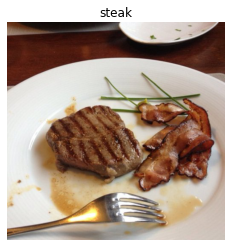

In [7]:
#checking the function
img =view_random_image(target_dir="pizza_steak/train/",
                       target_class="steak")

In [8]:
img,img.shape

(array([[[ 96,  52,  25],
         [ 93,  49,  22],
         [ 94,  48,  22],
         ...,
         [ 58,  21,  13],
         [ 59,  22,  14],
         [ 61,  24,  16]],
 
        [[ 93,  49,  22],
         [ 91,  47,  20],
         [ 92,  46,  20],
         ...,
         [ 58,  21,  13],
         [ 59,  22,  14],
         [ 60,  23,  15]],
 
        [[ 94,  50,  23],
         [ 93,  49,  22],
         [ 94,  48,  22],
         ...,
         [ 59,  22,  14],
         [ 58,  21,  13],
         [ 58,  21,  13]],
 
        ...,
 
        [[137, 140, 133],
         [138, 140, 135],
         [141, 143, 138],
         ...,
         [206, 196, 187],
         [206, 196, 187],
         [206, 196, 187]],
 
        [[150, 158, 145],
         [151, 159, 146],
         [153, 161, 150],
         ...,
         [205, 195, 186],
         [205, 195, 186],
         [205, 195, 186]],
 
        [[163, 174, 157],
         [163, 174, 157],
         [163, 174, 158],
         ...,
         [205, 195, 186],
  

In [9]:
img/255


array([[[0.37647059, 0.20392157, 0.09803922],
        [0.36470588, 0.19215686, 0.08627451],
        [0.36862745, 0.18823529, 0.08627451],
        ...,
        [0.22745098, 0.08235294, 0.05098039],
        [0.23137255, 0.08627451, 0.05490196],
        [0.23921569, 0.09411765, 0.0627451 ]],

       [[0.36470588, 0.19215686, 0.08627451],
        [0.35686275, 0.18431373, 0.07843137],
        [0.36078431, 0.18039216, 0.07843137],
        ...,
        [0.22745098, 0.08235294, 0.05098039],
        [0.23137255, 0.08627451, 0.05490196],
        [0.23529412, 0.09019608, 0.05882353]],

       [[0.36862745, 0.19607843, 0.09019608],
        [0.36470588, 0.19215686, 0.08627451],
        [0.36862745, 0.18823529, 0.08627451],
        ...,
        [0.23137255, 0.08627451, 0.05490196],
        [0.22745098, 0.08235294, 0.05098039],
        [0.22745098, 0.08235294, 0.05098039]],

       ...,

       [[0.5372549 , 0.54901961, 0.52156863],
        [0.54117647, 0.54901961, 0.52941176],
        [0.55294118, 0

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set ranodm seed
tf.random.set_seed(42)

#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)

# create a CNN model
model_1 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")                    
])

#Compile
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1=model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps =len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 437ms/step - loss: 0.5874 - accuracy: 0.6847 - val_loss: 0.4258 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4296 - accuracy: 0.8147 - val_loss: 0.3360 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 10s 202ms/step - loss: 0.3895 - accuracy: 0.8227 - val_loss: 0.3469 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3661 - accuracy: 0.8460 - val_loss: 0.3166 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3219 - accuracy: 0.8693 - val_loss: 0.3608 - val_accuracy: 0.8460


In [11]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [12]:
#Set random seed
tf.random.set_seed(42)

#create model
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])
#compile
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fitting
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.9397 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [14]:
#set random seed
tf.random.set_seed(42)
#creating the model'
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

#compiling
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#model fitting
history_3=model_3.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 5.7070 - accuracy: 0.6027 - val_loss: 1.0352 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7500 - accuracy: 0.7173 - val_loss: 0.5363 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5678 - accuracy: 0.7533 - val_loss: 0.4891 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6676 - accuracy: 0.7180 - val_loss: 0.7021 - val_accuracy: 0.5980
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5898 - accuracy: 0.7487 - val_loss: 0.4474 - val_accuracy: 0.7600


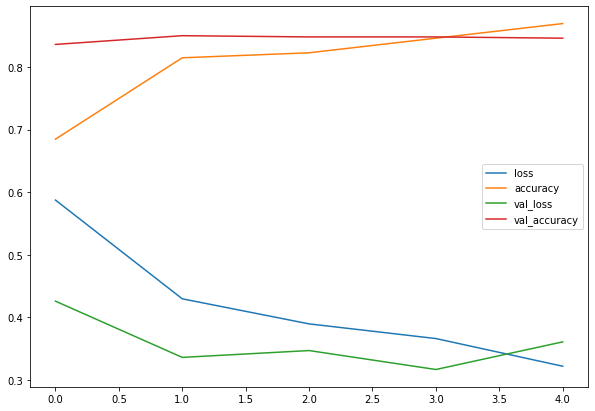

In [15]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))


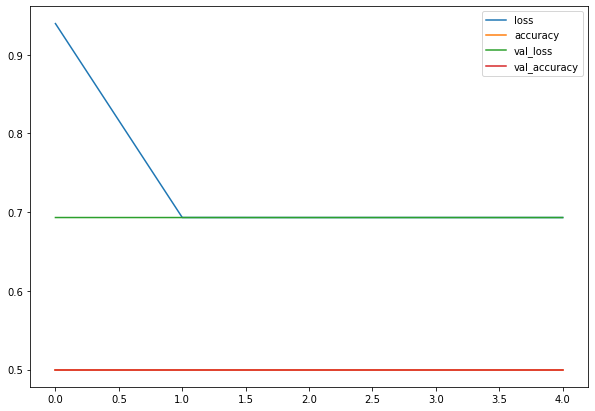

In [16]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))

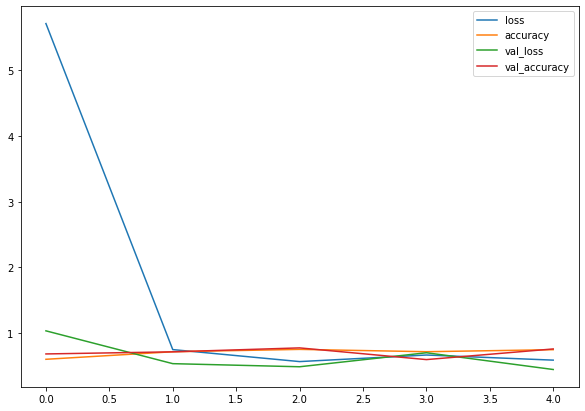

In [17]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


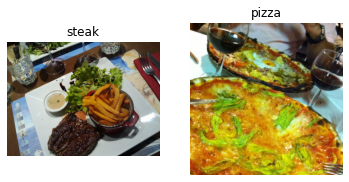

In [18]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/test/","pizza")

In [19]:
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# End to End example
Let's build a convolutional network to find out patterns in our images,more specifically we need the following steps:

* Load data
* Preprocess our image data
* Build a CNN to find the pattern
* compile the model
* Fit the CNN to our training data

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(1./255)
test_datagen =ImageDataGenerator(1./255)

In [21]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)
test_data=train_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
images,labels=train_data.next()
len(images),len(labels)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(32, 32)

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [24]:
model_4=Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation='sigmoid')
])


In [25]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [26]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 312.6380 - accuracy: 0.6253 - val_loss: 9.6832 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 4.9324 - accuracy: 0.7927 - val_loss: 4.0516 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.7460 - accuracy: 0.9213 - val_loss: 3.2561 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1161 - accuracy: 0.9800 - val_loss: 3.1933 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.0614 - accuracy: 0.9900 - val_loss: 2.9673 - val_accuracy: 0.7620


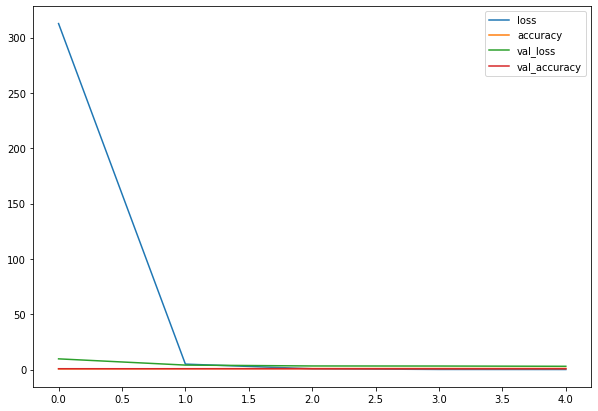

In [27]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));


In [28]:
#plot validation and training curves separately
def plot_loss_curves(history):
  """ 
  Returns separate loss curves for trainig and validation metrics
  """
  loss= history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.figure()
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

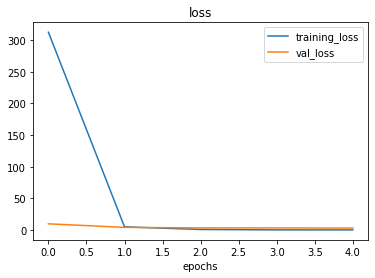

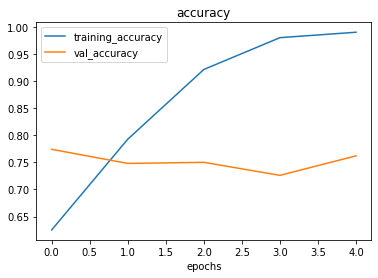

In [29]:
#check out the loss and accuracy of model_4
plot_loss_curves(history_4)

## Ideally the two loss curves (training and validation) will be very similar to each other decreasing at similar rates), when there are large differences your model may be overfitting.


## Adjust model model parameters

Fitting a machine learning model in 3 steps
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting


Ways to induce overfitting:
* increase number of conv layers
* increase the number of conv filters
* add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* add data augementation
* add regularization layers(such as Maxpool2D)
* add more data.. 

In [30]:
# Since the our previous model_4 is overfitting we'll try to reduce it by adding regularization layer(such as Maxpool2d)

#create model
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3 ,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [31]:
# Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



In [32]:
history_5 =model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 10s 190ms/step - loss: 8.8836 - accuracy: 0.5520 - val_loss: 0.9539 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.7029 - accuracy: 0.6907 - val_loss: 0.7665 - val_accuracy: 0.6200
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4896 - accuracy: 0.7607 - val_loss: 0.7595 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3584 - accuracy: 0.8360 - val_loss: 0.7155 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.2679 - accuracy: 0.8840 - val_loss: 0.7218 - val_accuracy: 0.7400


In [33]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

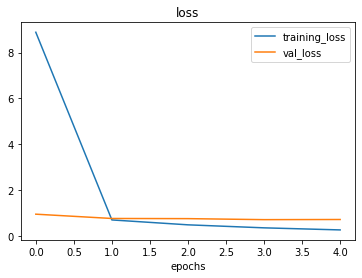

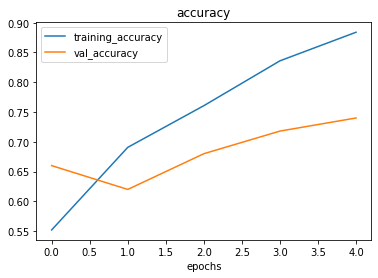

In [34]:
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [35]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.3,
                                        horizontal_flip=True)

# Create data generator wihtout data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

## what is data augmentaion

Data augmentation is the process of altering our training data,leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) patterns and altering mean adjusting the rotation of an image,flipping it,cropping it or something similiar



In [36]:
from tensorflow.python.ops.control_flow_ops import from_control_flow_context_def
#lets visualize data augmentation
#import data and augemnt it from training directory
print("augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)  ## for demonstratiob only

#Create a non augmented data batches
print("non augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle =False)

print("non augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")
                                           

augmented training data
Found 1500 images belonging to 2 classes.
non augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


## Data augmenation usually is only preformed on the training data. It takes place when we load the model

In [37]:
#visualize
images,labels =train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()  # only images are augmented and not the labels


showing image number:20


(-0.5, 223.5, 223.5, -0.5)

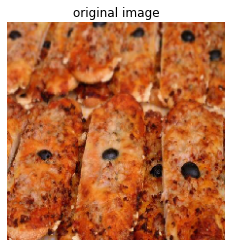

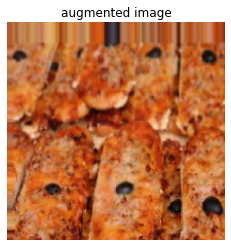

In [38]:
#show the original image and augmented
import random
random_number=random.randint(0,32) #batch size is 32 
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

Now we've seen what augmented training data is lets build a model and see how it learns  


In [39]:
#create a model
model_6=Sequential([
    Conv2D(10,3,activation="relu"),
    
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [40]:
#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 514ms/step - loss: 0.7001 - accuracy: 0.4633 - val_loss: 0.6828 - val_accuracy: 0.6060
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6921 - accuracy: 0.5540 - val_loss: 0.6666 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6834 - accuracy: 0.6287 - val_loss: 0.6547 - val_accuracy: 0.5640
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.7067 - accuracy: 0.4953 - val_loss: 0.6590 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6788 - accuracy: 0.6047 - val_loss: 0.6376 - val_accuracy: 0.7780


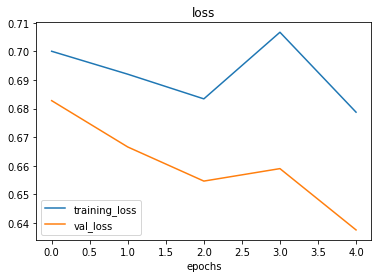

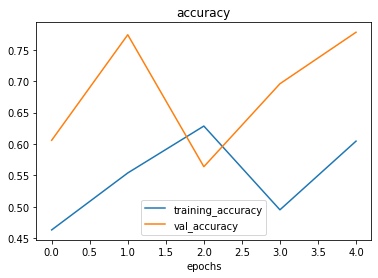

In [41]:
plot_loss_curves(history_6)

In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [43]:
## Let's Shuffle our augmented training data
#import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [44]:
#create a model (same as model_5 and model_6)
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fitting
history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 474ms/step - loss: 0.6374 - accuracy: 0.6340 - val_loss: 0.4975 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5236 - accuracy: 0.7400 - val_loss: 0.3682 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.5124 - accuracy: 0.7600 - val_loss: 0.3638 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4923 - accuracy: 0.7547 - val_loss: 0.3481 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4767 - accuracy: 0.7827 - val_loss: 0.3300 - val_accuracy: 0.8600


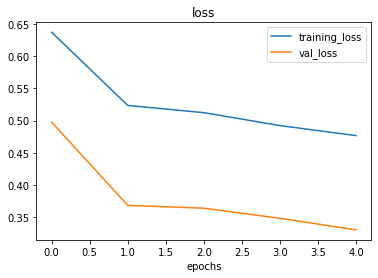

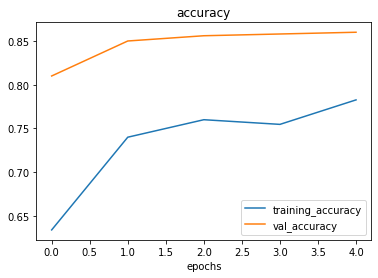

In [45]:
#plot loss curves
plot_loss_curves(history_7)

## When shuffling the training data, the model gets exposed to all different kinds of data training, thus enabling it to learn features across a aide array of images .

## Repeat until satisfied

Since we have already beaten our baseline model,  there are few things we could try to contiue to imporve our model.

* Increase the number of model layers.
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Finding an ideal learning rate
* get more data
* can use transfer learning

In [46]:
# making a prediction with a trained model on our own custom data

In [47]:
#classed we're workering with
print(class_names)

['pizza' 'steak']


In [48]:
# view our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")

--2023-01-04 14:13:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-01-04 14:13:52 (44.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



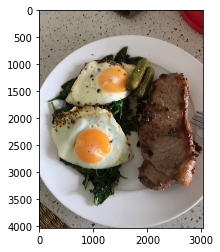

In [49]:
plt.imshow(steak)
#plt.axis(False)

In [50]:
expanded_steak = tf.expand_dims(steak,axis=0)

In [51]:
import tensorflow as tf

In [52]:
# create  afunction to import and image and resize it to be able to used with your model
def load_and_prep_image(filename,img_shape =224):
  """
  Reads an image from filename. turns into tensor and reshapes it to(img_shape,img_shape,colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # decode the read file into tensor
  img = tf.image.decode_image(img,channels=3)
  #resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [53]:
#load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [54]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 170ms/step


array([[0.74787366]], dtype=float32)

# looks like our custom image has been put through the model however it currently outputs a prediction probablity, wouldnt it be better to visualize it.


In [55]:
#we can index the predicted class by rounding the predcition probability and indexing it on class names
pred_class= class_names[int(tf.round(pred))]
pred_class

'steak'

In [56]:
def pred_and_plot(model,filename,class_names=class_names):
  """ 
  imports an image loacted at filename ,makes a prediction with model and 
  plots the image with the prediction class as title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred=model_7.predict(tf.expand_dims(img,axis=0))

  #get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 15ms/step


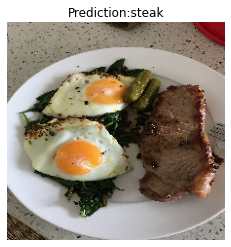

In [57]:
pred_and_plot(model_7,"03-steak.jpeg")

In [58]:
#lets try on another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2023-01-04 14:13:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-01-04 14:13:55 (68.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 18ms/step


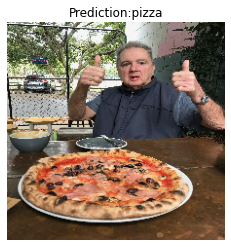

In [59]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

# Multi-class Image classification

1. Become one with the data
2. Preprocess the data
3. Create a model
4. fit the model
5. Evaluate the model
6. Adjust different hypermeters and improve the model
7. Repeat until satisfied

In [60]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-01-04 14:13:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   210MB/s    in 2.4s    

2023-01-04 14:13:57 (210 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
import os

#walkthrough 10 classses of food image data
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [62]:
#setup the train and test data directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [63]:
#lets get the class names
import pathlib
import numpy as np
data_dir= pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 384, 3)


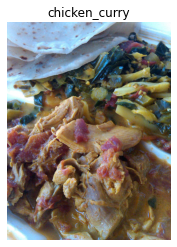

In [64]:
#visualize
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

# PreProcess the data


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen =ImageDataGenerator(rescale=1/255.)

#load data in directories and turn them into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Start with a baseline model(replicating cnn explaining model since its uses 10 classes too)

In [66]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [67]:
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')  # changed to 10 output neuron and activation="softmax"
])

#compile
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#fitting the model
history_8=model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 206ms/step - loss: 2.1822 - accuracy: 0.1849 - val_loss: 2.0109 - val_accuracy: 0.2836
Epoch 2/5
235/235 [==============================] - 46s 195ms/step - loss: 1.8891 - accuracy: 0.3393 - val_loss: 1.8397 - val_accuracy: 0.3584
Epoch 3/5
235/235 [==============================] - 45s 192ms/step - loss: 1.5443 - accuracy: 0.4769 - val_loss: 1.9555 - val_accuracy: 0.3320
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.9590 - accuracy: 0.6763 - val_loss: 2.4440 - val_accuracy: 0.2952
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.3865 - accuracy: 0.8776 - val_loss: 3.3331 - val_accuracy: 0.2844


# evaluate The model


In [68]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 3.3331 - accuracy: 0.2844


[3.333122730255127, 0.28439998626708984]

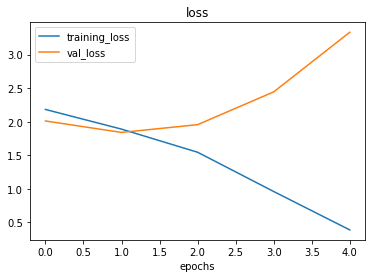

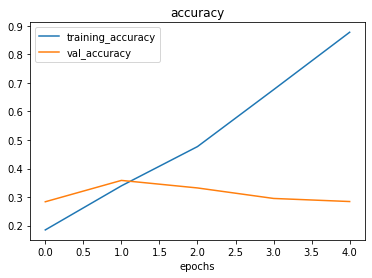

In [69]:
plot_loss_curves(history_8)

# Well it seems our model is **overfitting** coz its performing very well on trainig data and poorly on test data


## Adjusting our model

due to ut performance on the training data,its clear our model is learning something..

However, its not generalizing well to unseen data leading to overfitting

So, lets try and fix it

* Getting more data - having more data gives the model the opportunity to learn diverse patterns

* simplify the model -  if our model  is overfitting the data, it may be too complicated of model,one way is to simplify is to reduce the  number of layers,reduce hidden units
* use data augementation -  data augmentation manipulates teh training data in such a way to add more diversity to it
* Use transfer learning - training learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset



In [70]:
#so lets simplify the model first
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [71]:
model_9 =Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

#compile
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 195ms/step - loss: 2.3465 - accuracy: 0.2120 - val_loss: 1.9864 - val_accuracy: 0.2784
Epoch 2/5
235/235 [==============================] - 43s 185ms/step - loss: 1.7983 - accuracy: 0.3848 - val_loss: 1.8643 - val_accuracy: 0.3440
Epoch 3/5
235/235 [==============================] - 44s 185ms/step - loss: 1.4301 - accuracy: 0.5319 - val_loss: 1.9300 - val_accuracy: 0.3300
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 1.0199 - accuracy: 0.6753 - val_loss: 2.1635 - val_accuracy: 0.3292
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.6308 - accuracy: 0.8149 - val_loss: 2.5311 - val_accuracy: 0.2952


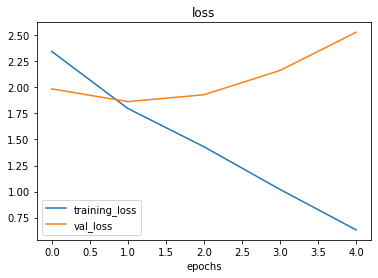

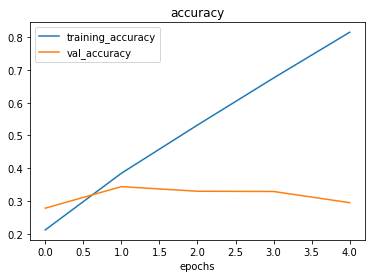

In [72]:
plot_loss_curves(history_9)

In [73]:
model_9.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [74]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

# Since simplifying the model didn't work we'll have to try with data augmentation

SO lets try to reduce overfitting using data augmentation

In [75]:
# create an augmented data generator
train_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = 'categorical')


Found 7500 images belonging to 10 classes.


In [76]:
#lets create another model and fit it on the new augmented data
model_10=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

#compile
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=['accuracy'])

# fitting the model
history_10  =model_10.fit(train_data_augmented,
                         epochs=10,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 111s 471ms/step - loss: 2.2199 - accuracy: 0.1809 - val_loss: 2.0995 - val_accuracy: 0.2652
Epoch 2/10
235/235 [==============================] - 113s 480ms/step - loss: 2.1217 - accuracy: 0.2325 - val_loss: 2.0072 - val_accuracy: 0.2772
Epoch 3/10
235/235 [==============================] - 111s 471ms/step - loss: 2.0760 - accuracy: 0.2527 - val_loss: 1.9882 - val_accuracy: 0.3096
Epoch 4/10
235/235 [==============================] - 111s 470ms/step - loss: 2.0422 - accuracy: 0.2784 - val_loss: 1.9205 - val_accuracy: 0.3204
Epoch 5/10
235/235 [==============================] - 113s 482ms/step - loss: 2.0104 - accuracy: 0.2907 - val_loss: 1.8992 - val_accuracy: 0.3424
Epoch 6/10
235/235 [==============================] - 110s 470ms/step - loss: 1.9743 - accuracy: 0.3112 - val_loss: 1.8675 - val_accuracy: 0.3652
Epoch 7/10
235/235 [==============================] - 121s 516ms/step - loss: 1.9550 - accuracy: 0.3159 - val_loss: 1.8122 -

In [77]:
model_10.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [78]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 1.7837 - accuracy: 0.3896


[1.7837412357330322, 0.38960000872612]

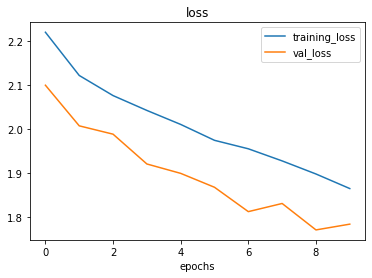

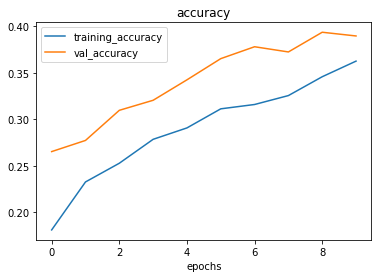

In [79]:
plot_loss_curves(history_10)

Woah!! that looks much better the loss curves are much better and if we run for longer we might get better results.

In [80]:
## making a prediction with our model
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [81]:
#download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-01-04 14:41:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-01-04 14:41:49 (66.8 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-01-04 14:41:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

1/1 [==============================] - 0s 18ms/step


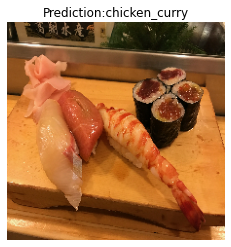

In [82]:
#make prediction using model_10
pred_and_plot(model_10,"03-sushi.jpeg",
              class_names=class_names)

In [83]:
#reconfigured for multi-class
def pred_and_plot(model,filename,class_names=class_names):
  """ 
  imports an image loacted at filename ,makes a prediction with model and 
  plots the image with the prediction class as title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred=model_7.predict(tf.expand_dims(img,axis=0))

  #add logic for multiclass
  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 16ms/step


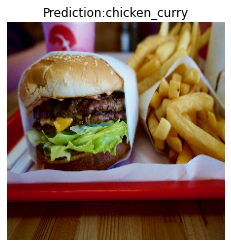

In [84]:
pred_and_plot(model_10,"03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perfom very well since it had only 44 % of accuracy


Saving and loading our model

In [85]:
#Save model
model_10.save("Saved_trained_model_10")


In [86]:
#load in a trained model and evaluate it
loaded_model_10=tf.keras.models.load_model("Saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 1.7837 - accuracy: 0.3896


[1.7837408781051636, 0.38960000872612]

In [87]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.7837 - accuracy: 0.3896


[1.7837413549423218, 0.38960000872612]

In [88]:
model_11=Sequential([
    Conv2D(32,4,input_shape=(224,224,3),activation="tanh"),
    Conv2D(30,4,activation="tanh"),
    MaxPool2D(),
    Conv2D(30,4,activation="tanh"),
    Conv2D(30,4,activation="tanh"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
#compile
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(lr=0.001),
                 metrics=["accuracy"])

#fitting the model
history_11=model_11.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
235/235 [==============================] - 118s 493ms/step - loss: 2.3514 - accuracy: 0.1985 - val_loss: 2.0226 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 116s 495ms/step - loss: 2.1177 - accuracy: 0.2485 - val_loss: 2.0265 - val_accuracy: 0.2884
Epoch 3/5
235/235 [==============================] - 115s 490ms/step - loss: 2.0793 - accuracy: 0.2681 - val_loss: 2.0422 - val_accuracy: 0.2724
Epoch 4/5
235/235 [==============================] - 115s 488ms/step - loss: 2.0565 - accuracy: 0.2788 - val_loss: 2.0672 - val_accuracy: 0.2676
Epoch 5/5
235/235 [==============================] - 115s 489ms/step - loss: 2.0365 - accuracy: 0.2840 - val_loss: 1.8307 - val_accuracy: 0.3620
